IMPORTING PACKAGES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

LOADING THE DATASET

In [3]:
penguins=pd.read_csv("penguins.csv",sep=",")

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250,FEMALE
3,Adelie,NaN,36.7,19.3,193.0,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650,MALE


In [5]:
penguins.shape

(329, 7)

In [6]:
penguins[penguins["island"].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,NaN,36.7,19.3,193.0,3450,FEMALE
112,Adelie,NaN,35.2,15.9,186.0,3050,FEMALE
140,Chinstrap,NaN,38.2,19.5,NaN,2800,MALE


Dropping Rows that are Having Null Values

In [7]:
penguins.dropna(axis=0,inplace=True)

In [8]:
penguins.shape

(325, 7)

 *VISUALIZATION (Univariate and Bivariate)*

In [9]:
penguins.species.value_counts()

Adelie       137
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

<AxesSubplot:>

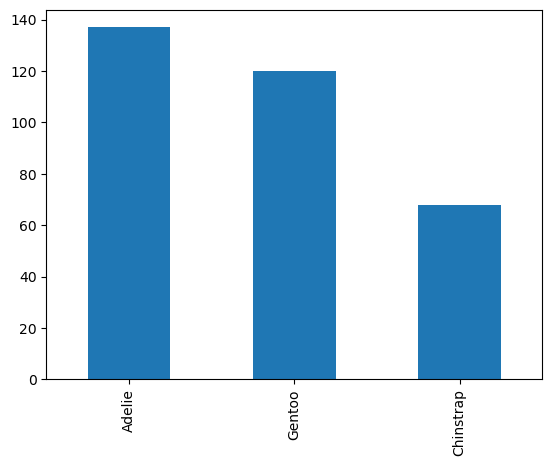

In [10]:
penguins.species.value_counts().plot.bar()

In [11]:
penguins.sex.value_counts()

MALE      168
FEMALE    157
Name: sex, dtype: int64

<AxesSubplot:ylabel='sex'>

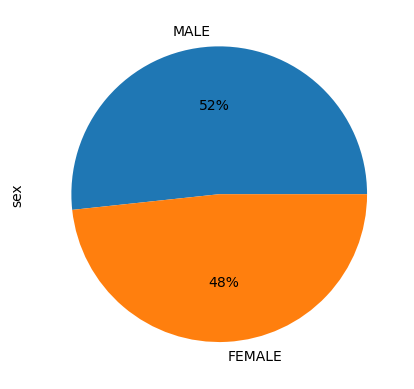

In [12]:
penguins.sex.value_counts().plot(kind="pie",autopct='%1.0f%%')

<AxesSubplot:ylabel='island'>

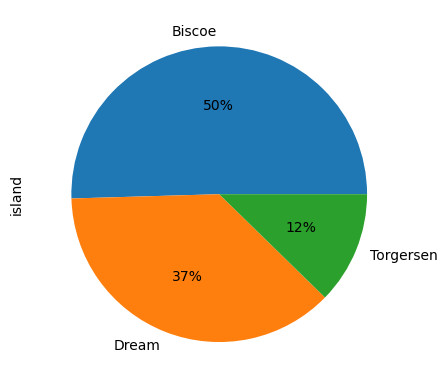

In [13]:
penguins.island.value_counts().plot(kind="pie",autopct='%1.0f%%')

<AxesSubplot:xlabel='species', ylabel='count'>

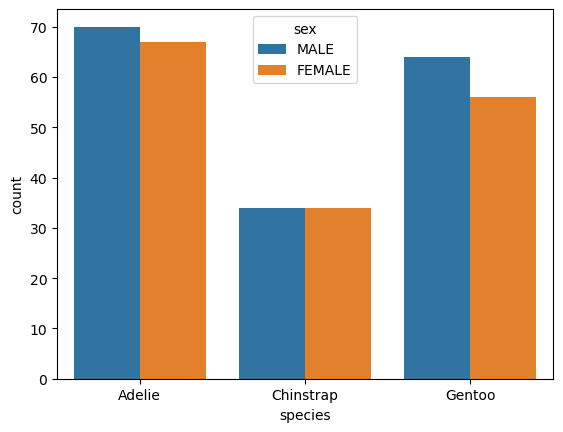

In [14]:
sns.countplot(data=penguins,x="species",hue="sex")

<AxesSubplot:ylabel='Frequency'>

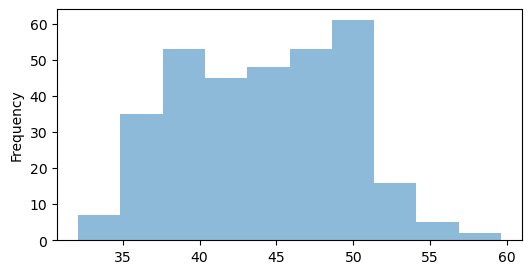

In [15]:
plt.figure(figsize=(6,3))
penguins.bill_length_mm.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

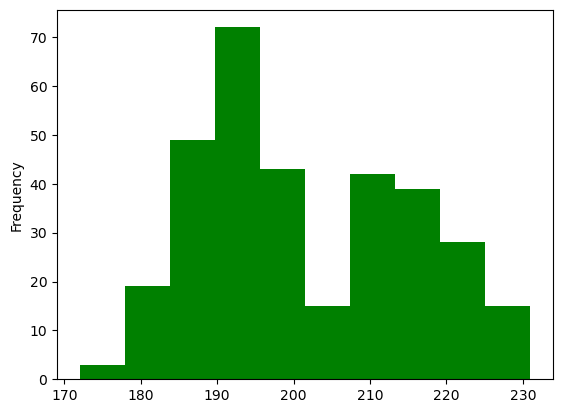

In [16]:
penguins.flipper_length_mm.plot.hist(color="green")

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

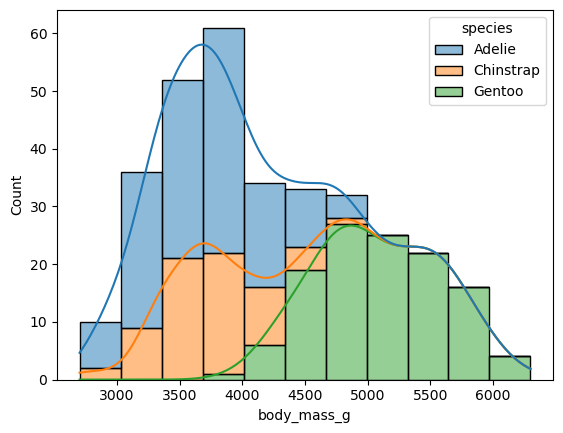

In [17]:

sns.histplot(data=penguins, x="body_mass_g",hue="species",multiple="stack",kde=True)

<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

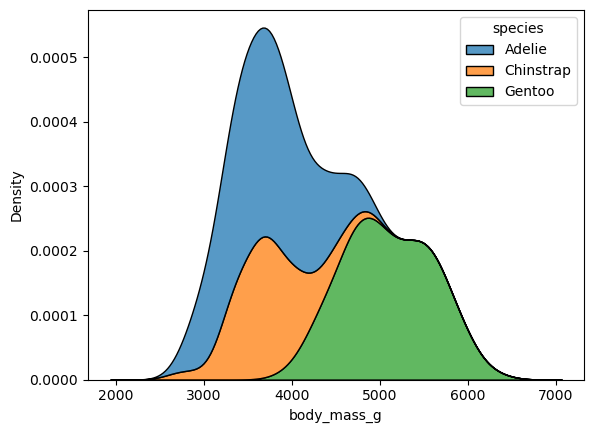

In [18]:
sns.kdeplot(data=penguins,x="body_mass_g",hue="species",multiple='stack')

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

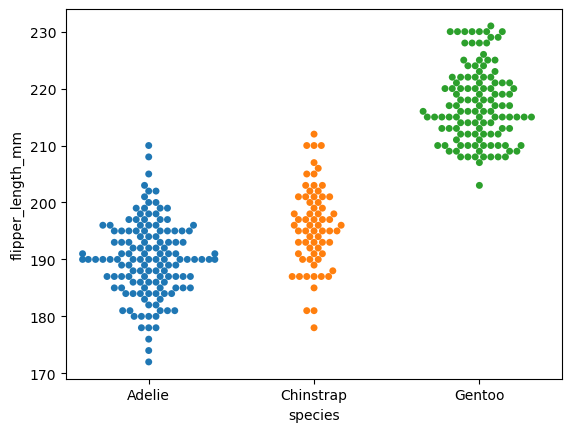

In [19]:
sns.swarmplot(data=penguins,x="species",y="flipper_length_mm")

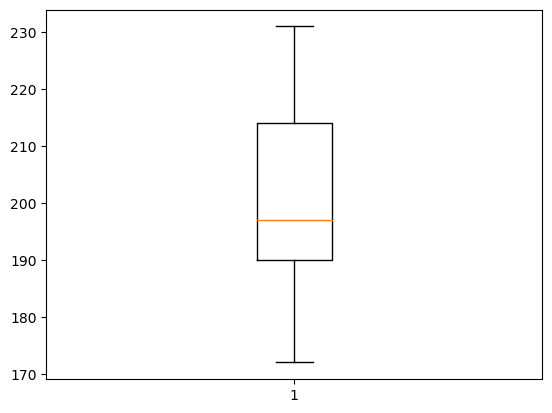

In [20]:
plt.boxplot(penguins["flipper_length_mm"])
plt.show()

<AxesSubplot:ylabel='body_mass_g'>

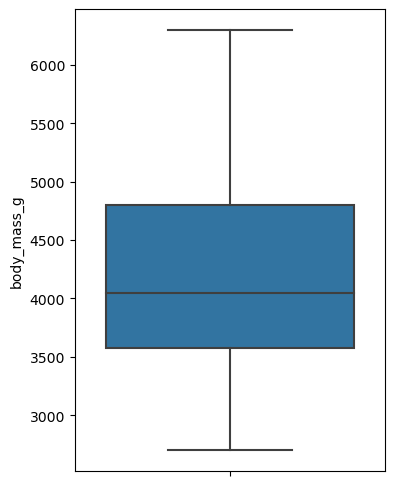

In [21]:
plt.figure(figsize=(4,6))
sns.boxplot(data=penguins, y="body_mass_g")

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

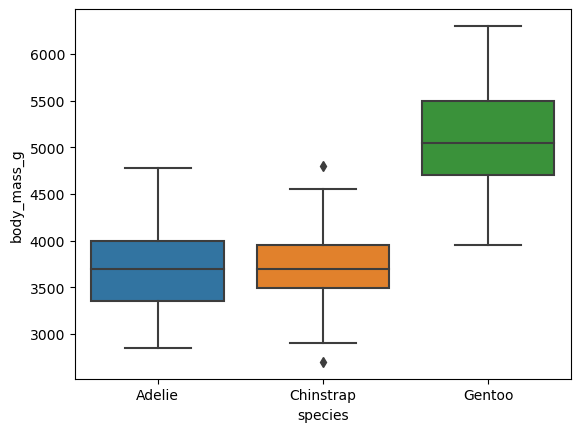

In [22]:
sns.boxplot(data=penguins,x="species",y="body_mass_g")

<AxesSubplot:ylabel='body_mass_g'>

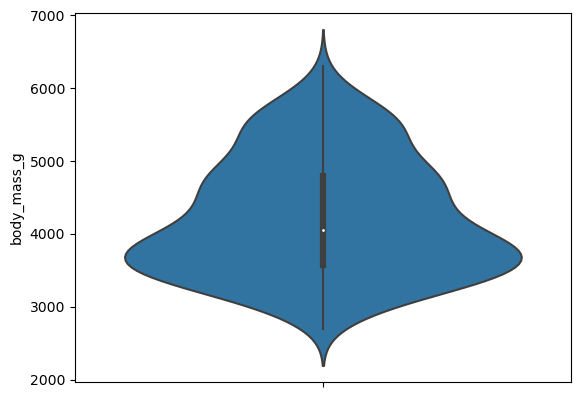

In [23]:
sns.violinplot(data=penguins,y="body_mass_g")

In [24]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

<AxesSubplot:>

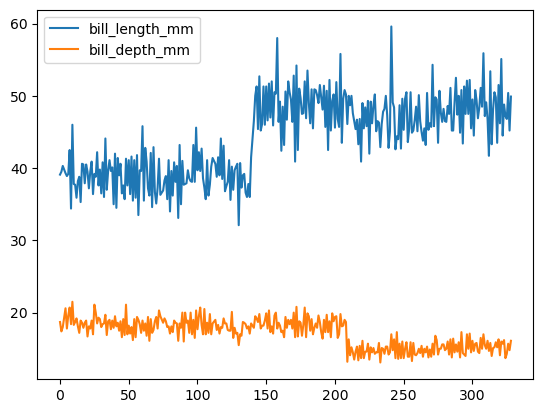

In [25]:
penguins[["bill_length_mm","bill_depth_mm"]].plot.line()

Text(0.5, 1.0, 'Relation between Length and bill depth of Penguins')

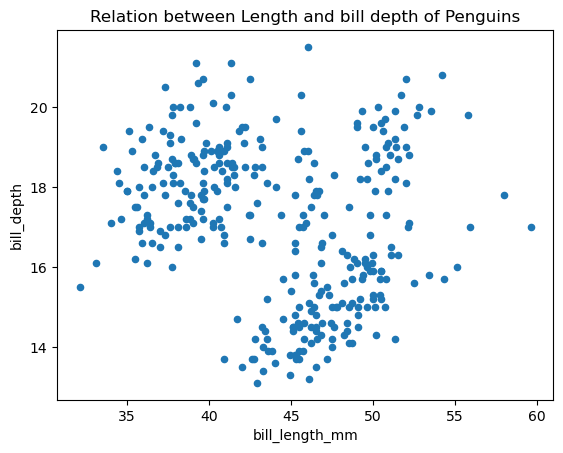

In [26]:
penguins.plot.scatter(x="bill_length_mm",y="bill_depth_mm")
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth')
plt.title("Relation between Length and bill depth of Penguins")

Text(0.5, 1.0, 'Relation between Length and Body Mass of Penguin')

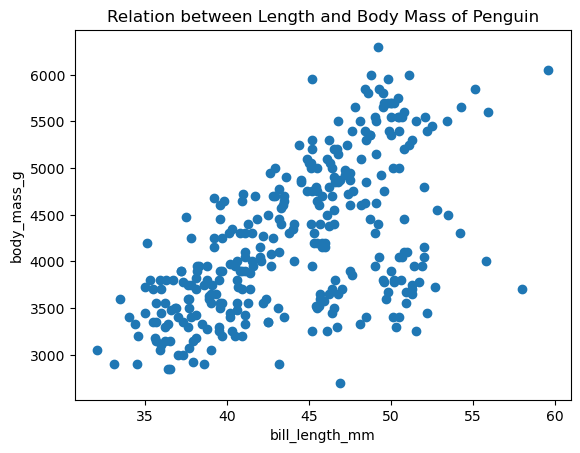

In [27]:
plt.scatter(penguins["bill_length_mm"],penguins["body_mass_g"])
plt.xlabel('bill_length_mm')
plt.ylabel('body_mass_g')
plt.title("Relation between Length and Body Mass of Penguin")

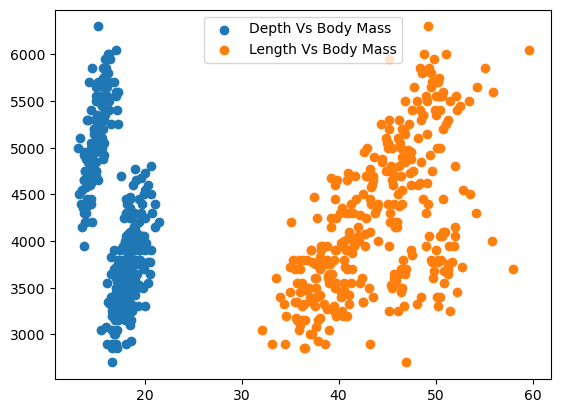

In [28]:
plt.scatter(penguins["bill_depth_mm"],penguins["body_mass_g"],label='Depth Vs Body Mass')
plt.scatter(penguins["bill_length_mm"],penguins["body_mass_g"],label="Length Vs Body Mass")
plt.legend()

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

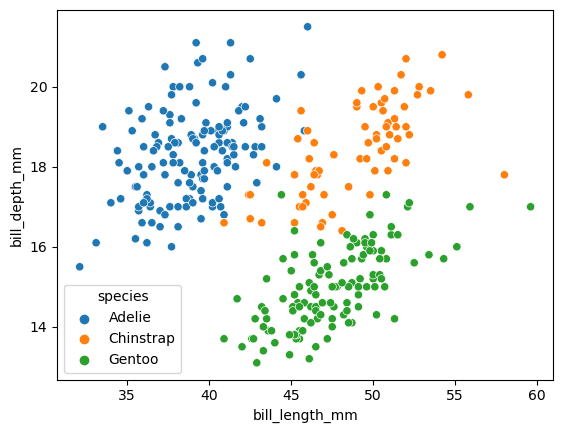

In [29]:
sns.scatterplot(data=penguins,x="bill_length_mm",y="bill_depth_mm",hue="species")

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

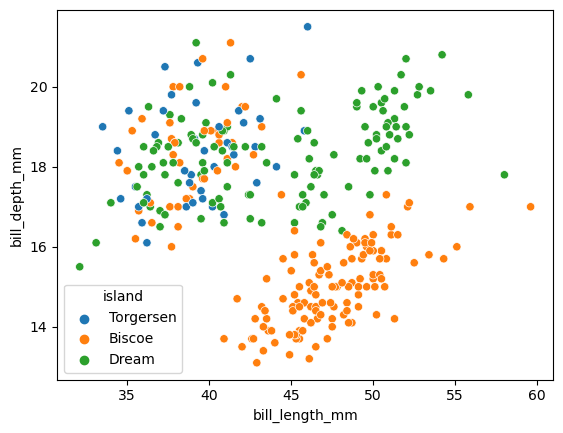

In [30]:
sns.scatterplot(data=penguins,x="bill_length_mm",y="bill_depth_mm",hue="island")

MODEL BUILDING
MULTIPLE LINEAR REGRESSION

*IMPORTING REQUIRED PACKAGES*

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [32]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650,MALE
5,Adelie,Torgersen,38.9,17.8,181.0,3625,FEMALE


Text(0, 0.5, 'Body Mass')

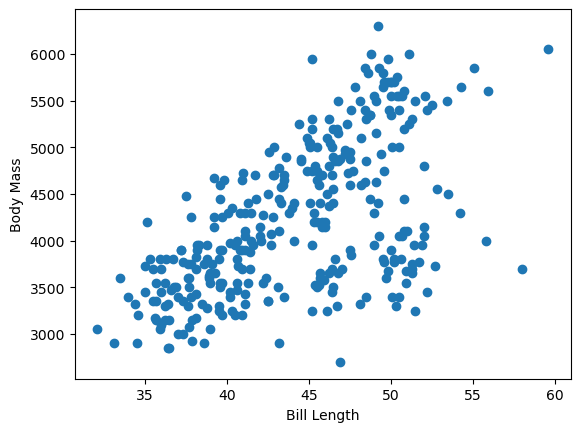

In [33]:
plt.scatter(penguins["bill_length_mm"],penguins["body_mass_g"])
plt.xlabel("Bill Length")
plt.ylabel("Body Mass")

In [34]:
np.corrcoef(penguins["bill_length_mm"],penguins["body_mass_g"])[0][1]

0.5844350371852092

Text(0, 0.5, 'Body Mass')

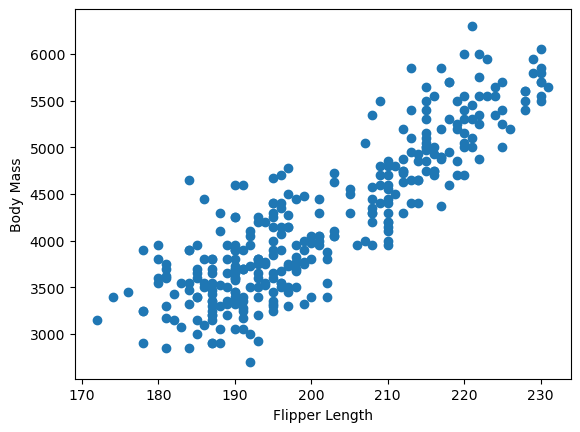

In [35]:
plt.scatter(penguins["flipper_length_mm"],penguins["body_mass_g"])
plt.xlabel("Flipper Length")
plt.ylabel("Body Mass")

In [36]:
np.corrcoef(penguins["flipper_length_mm"],penguins["body_mass_g"])[0][1]

0.8728166266311262

In [37]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650,MALE
5,Adelie,Torgersen,38.9,17.8,181.0,3625,FEMALE


EXTRACTING THE REQUIRED COLUMNS (Independent and Dependent)

In [38]:
X=penguins.iloc[:,[2,4]]
X

,bill_length_mm,flipper_length_mm
0,39.1,181.0
1,39.5,186.0
2,40.3,195.0
4,39.3,190.0
5,38.9,181.0
...,...,...
324,47.2,214.0
325,46.8,215.0
326,50.4,222.0
327,45.2,212.0


In [39]:
y=penguins.iloc[:,5]
y

0      3750
1      3800
2      3250
4      3650
5      3625
       ... 
324    4925
325    4850
326    5750
327    5200
328    5400
Name: body_mass_g, Length: 325, dtype: int64

In [40]:
#Spliting the data into train and test
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [41]:
X_train.shape

(260, 2)

In [42]:
#Creating an instance of Linear regression
MLR = LinearRegression()

In [43]:
#Training the model
MLR.fit(X_train,y_train)

LinearRegression()

In [44]:
#Getting the slope and intercept
print("A1 = ", MLR.coef_)
print("A0 = ",MLR.intercept_)

A1 =  [ 2.46881837 49.08271637]
A0 =  -5789.851749499137


In [45]:
#Testing the model : Making predictions on the trained model
y_pred = MLR.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.53203240403724

Here,R score gives the accuracy how close the model to original set

In [47]:
r2_score(y_test,y_pred)

0.7643550105542081